<a href="https://colab.research.google.com/github/Kwangbin/statistic/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. matplotlib version updgrade (v3.2.2 to v3.4.1)
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__


     |████████████████████████████████| 10.3 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


'3.2.2'

In [2]:

# 2. 한글 폰트 설치
# https://velog.io/@jgpark1998/Colab-%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-RuntimeWarning-%EC%98%A4%EB%A5%98-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,950 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

런타임 다시시작

In [1]:
#4. import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 한글 사용
plt.rc('font', family='NanumBarunGothic') 


<AxesSubplot:title={'center':'한글폰트'}>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


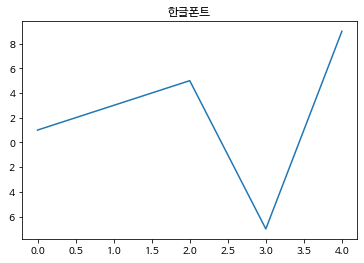

In [2]:
#5. 한글 출력 확인
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

###회귀분석은 현실세계에 발생하는 복잡한 현상의 특장을 잘 포착 단순화 한것

기말고사 점수와 쪽지시험과의 인과 관계가 있는지 알아보자

쪽지시험 평균, 기말고사, 수면시간, 학교등교방법

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import  stats
import  statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
%precision 3
%matplotlib inline

In [5]:
cd drive/MyDrive/ml/statistic/data/

/content/drive/MyDrive/ml/statistic/data


In [6]:
df = pd.read_csv('ch12_scores_reg.csv')

In [7]:
n= len(df)
n

20

In [8]:
df.head()

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


##단순회귀모형


In [9]:
x= np.array(df['quiz'])
y=np.array(df['final_test'])
p=1

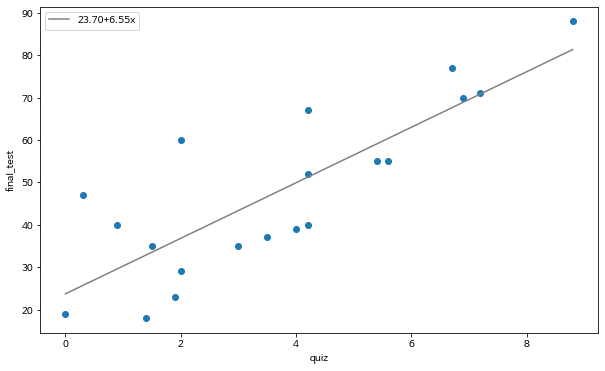

In [15]:
poly_fit=np.polyfit(x,y,1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(x.min(), x.max())
ys=poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final_test')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.scatter(x,y)
ax.legend()

plt.show()

In [16]:
poly_fit

array([ 6.554, 23.699])

## 단순회귀 모형

Y = B0 +B1x

x : 설명변수

Y : 반응변수



* 설명변수는 확률변수가 아니다   

(확률변수: 결과를 알아 맞힐수는 없지만, 취하는 값과 그 값이 나올 확률이 결정 되어 있는것)

(확률 모형: 확률을 사용한 무작위 추출 같은 방법)



##statsmodels 의 회귀분석

설명 변수: 쪽지시험 

반응변수 : 기말시험

쪽지 시험으로 기말 시험을 예측

In [18]:
df

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


In [23]:
formula = 'final_test ~ quiz'
result = smf.ols(formula,df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           8.59e-06
Time:                        05:15:40   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y = B0 +B1x

x : 설명변수

Y : 반응변수

Intercept	절편 B0

quiz	    기울기 B1

coef : 회귀계수의 추정값	std err:추정값의 표준 오차	t : 회귀계수에 관한 t 검정통계량 P>|t| : t검정통계량의 p값  [0.025	0.975] : 회귀계수의 95% 신뢰구간